# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_csv('water_potability.csv')

In [107]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 237.4 KB


In [162]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


# Data Preprocessing and Cleaning

In [110]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

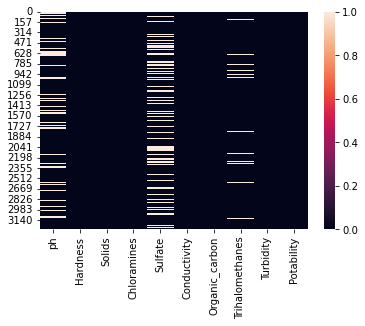

In [111]:
sns.heatmap(df.isna())

In [112]:
df.dropna(inplace = True)

In [113]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

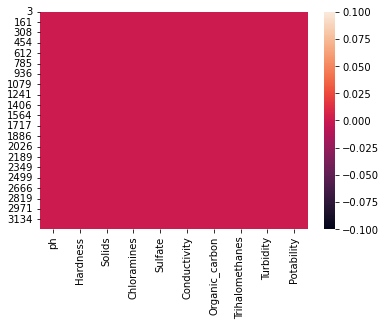

In [114]:
sns.heatmap(df.isna())

# Exploratory Data Analysis

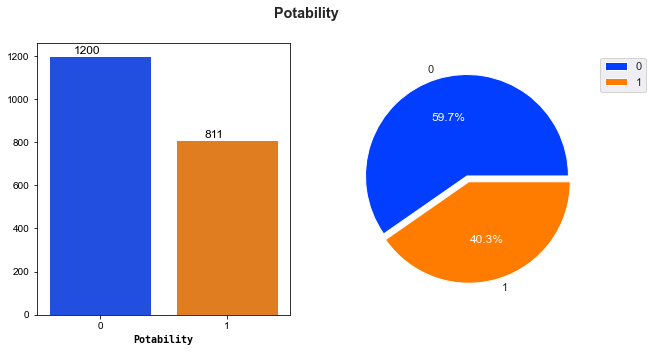

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x=df['Potability'].value_counts().index
y=df['Potability'].value_counts().values.tolist()
data = df.groupby("Potability").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("bright", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Potability', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Potability'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Potability',weight = 'bold')
plt.show()

<function matplotlib.pyplot.ioff()>

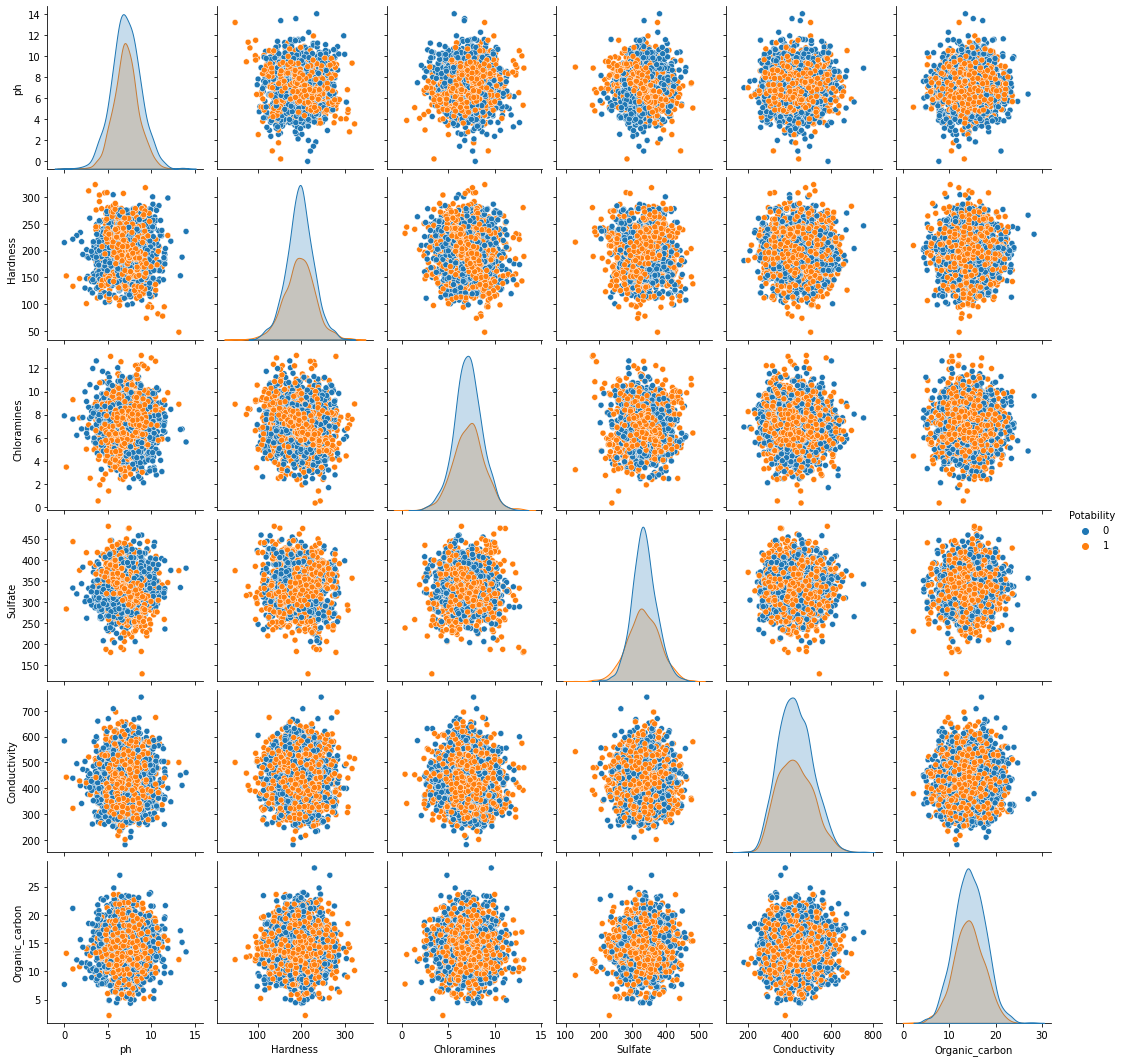

In [116]:
sns.pairplot(data,vars=['ph','Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon'] ,hue='Potability')
plt.ioff

# Feature Extraction and Scaling

In [119]:
x = df[list(df.columns)[0:-1]]

In [120]:
y = df['Potability']

In [121]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training

In [123]:
Tree_model = DecisionTreeClassifier()

In [124]:
Tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [135]:
tree_predict = Tree_model.predict(x_test)

In [136]:
acc_tree = accuracy_score(tree_predict, y_test)

In [137]:
print('Accuracy of Tree model:', 100 * acc_tree)

Accuracy of Tree model: 70.0



Confusion-Matrix:
 [[12  3]
 [ 3  2]]


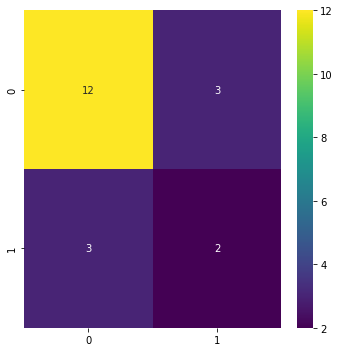

In [142]:
cm = confusion_matrix(y_test, tree_predict)
print('\nConfusion-Matrix:\n',cm)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, tree_predict),annot=True, fmt='g',cmap='viridis')
plt.tight_layout()
plt.show()

In [128]:
knn = KNeighborsClassifier()

In [129]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [143]:
knn_predict = knn.predict(x_test)

In [144]:
acc_knn = accuracy_score(knn_predict, y_test)

In [145]:
print('Accuracy of Tree model:', 100 * acc_knn)

Accuracy of Tree model: 75.0



Confusion-Matrix:
 [[12  3]
 [ 2  3]]


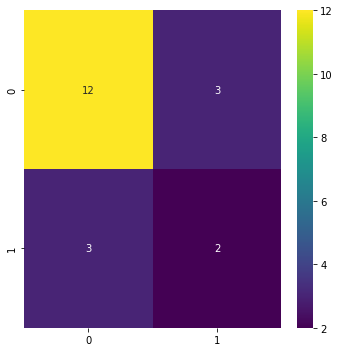

In [146]:
cm = confusion_matrix(y_test, knn_predict)
print('\nConfusion-Matrix:\n',cm)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, tree_predict),annot=True, fmt='g',cmap='viridis')
plt.tight_layout()
plt.show()